[Notebook](https://github.com/jmportilla/Udemy---Machine-Learning/blob/master/Decision%20Trees%20and%20Random%20Forests.ipynb)

[Decission Trees](https://www.youtube.com/watch?v=7VeUPuFGJHk&ab_channel=StatQuestwithJoshStarmer)

[Random Forest](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&ab_channel=StatQuestwithJoshStarmer)

[Random Forest part 2](https://www.youtube.com/watch?v=nyxTdL_4Q-Q&ab_channel=StatQuestwithJoshStarmer)

In [11]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

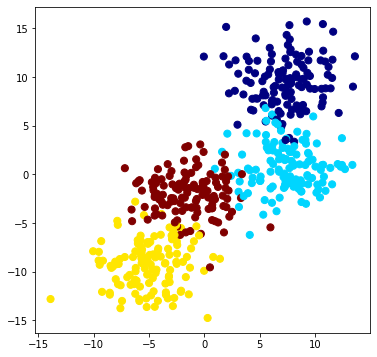

In [12]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=500,centers=4,random_state=8,cluster_std=2.4)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
def visualize_tree(classifier, X, y, boundaries=True, xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree.
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''

    # Fit the X and Y data to the tree
    classifier.fit(X, y)

    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[: 1].max() + 0.1)
    
    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim

    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)

    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet', shading='auto')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

    # Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''

        if i < 0:
            return
        
        # Shorter variable name
        tree = classifier.tree_

        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [ylim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

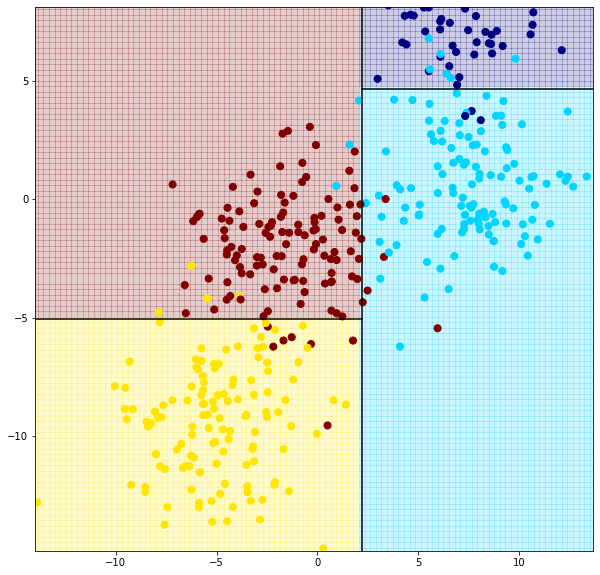

In [23]:
dec_tree_clf = DecisionTreeClassifier(max_depth=2,random_state=0)

visualize_tree(dec_tree_clf, X, y)

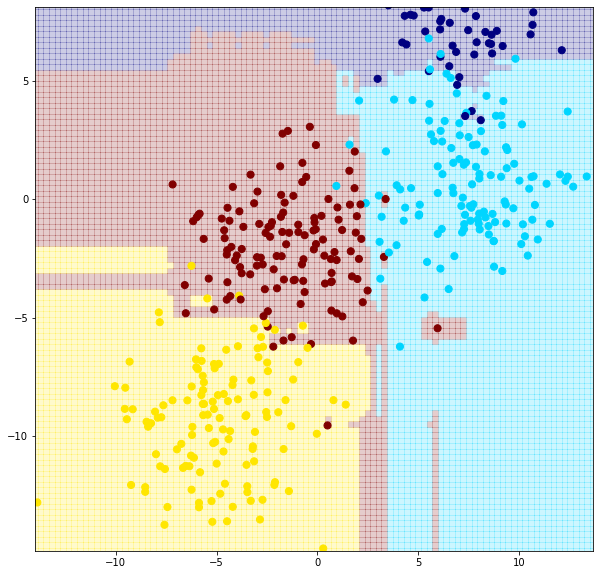

In [24]:
# Create RandomForest
from sklearn.ensemble import RandomForestClassifier

rand_forest_clf = RandomForestClassifier(n_estimators=100, random_state=0)

visualize_tree(rand_forest_clf, X, y, boundaries=False)

In [22]:
# Homework: Try to use train_test_split to compare Random Forest with Decision Trees
# Use it in the blob data and see the differences that are in accuracy between DecisionTrees and RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y)

In [25]:
dec_tree_clf.fit(X_train, Y_train) # Training Decision Tree model
rand_forest_clf.fit(X_train, Y_train) # Training Random Forest Model

RandomForestClassifier(random_state=0)

In [26]:
# Getting predictions from both models
dec_tree_pred = dec_tree_clf.predict(X_test)
rand_forest_pred = rand_forest_clf.predict(X_test)

In [28]:
# Checking performance
from sklearn import metrics

expected = Y_test

print('Decision Tree Accuracy:', metrics.accuracy_score(expected, dec_tree_pred))
print('Random Forest Accuracy:', metrics.accuracy_score(expected, rand_forest_pred))

Decision Tree Accuracy 0.704
Random Forest Accuracy 0.952


In [29]:
x = 10 * np.random.rand(100)

In [32]:
def sin_model(x, sigma=0.2):

    noise = sigma * np.random.rand(len(x))

    return np.sin(5*x) + np.sin(0.5 * x) + noise

In [33]:
y = sin_model(x)

<ErrorbarContainer object of 3 artists>

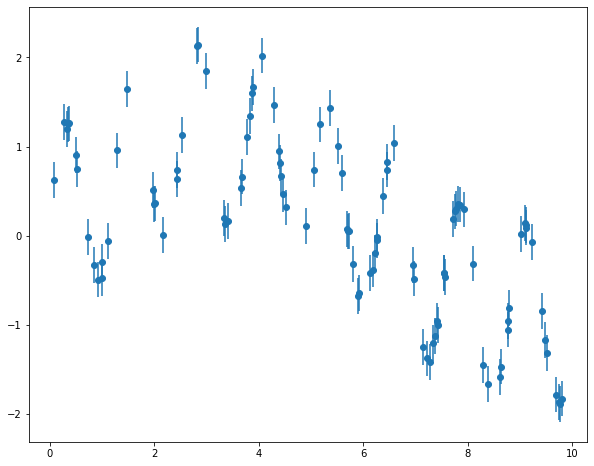

In [36]:
plt.figure(figsize=(10,8))
plt.errorbar(x,y,0.2,fmt='o')

In [38]:
from sklearn.ensemble import RandomForestRegressor

xfit = np.linspace(0,10,1000)

In [40]:
rfr = RandomForestRegressor(100)

rfr.fit(x[:,None],y)

yfit = rfr.predict(xfit[:,None])

In [41]:
ytrue = sin_model(xfit, 0)

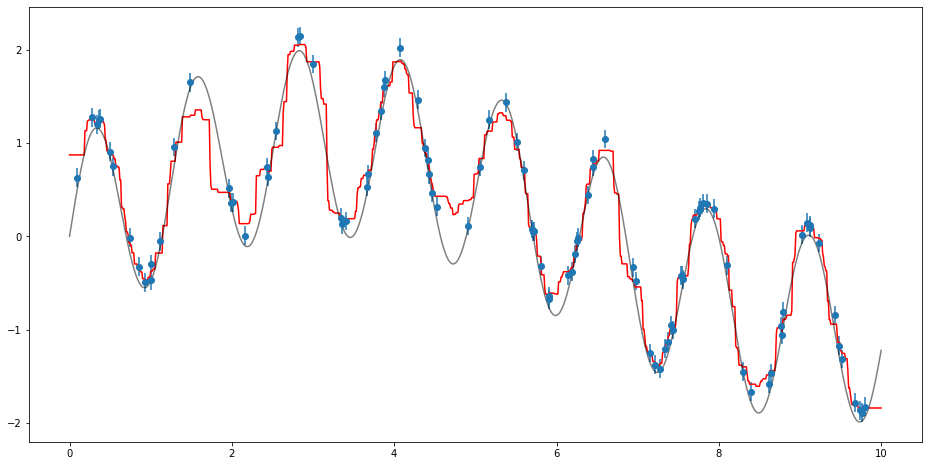

In [46]:
plt.figure(figsize=(16,8))

plt.errorbar(x,y,0.1,fmt='o')

plt.plot(xfit,yfit, '-r')

plt.plot(xfit,ytrue, '-k', alpha=0.5)